Ajoute des bibliotheque necessaire pour ce travail


Imports

In [8]:
from collections import Counter
from wordcloud import WordCloud
import os
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from IPython.display import Image
import os
import yake
from collections import defaultdict
import spacy
from spacy.lang.fr.examples import sentences
!python -m spacy download fr_core_news_md-3.8.0
from textblob import Blobber
from textblob_fr import PatternTagger, PatternAnalyzer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\taleb\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!



✘ No compatible package found for 'fr_core_news_md-3.8.0' (spaCy
v3.8.7)



In [9]:
# Choisir une année
year = 1939

In [10]:
# Instantier l'extracteur de mots clés
kw_extractor = yake.KeywordExtractor(lan="fr", top=50)
kw_extractor

In [12]:
# Lister les Fichiers de 1936
data_path = '../../data'
txt_path = '../../data/txt'
txts = [f for f in os.listdir(txt_path) if os.path.isfile(os.path.join(txt_path, f)) and str(year) in f]
len(txts)

100

In [13]:
# Pour stocker les mots par fichier
all_keywords = {}

In [14]:
# Parcourt tous les fichiers texte du dossier, lit leur contenu,
# extrait les mots-clés avec kw_extractor et les stocke dans un dictionnaire

for this_file in txts:
    with open(os.path.join(txt_path, this_file), 'r', encoding='utf-8') as f:
        text = f.read()
        # print(f"Aperçu de {this_file}")
        keywords = kw_extractor.extract_keywords(text)
        all_keywords[this_file] = keywords

print(keywords)  # Affiche les mots-clés extraits du dernier fichier


[('CHHÔNOGRAPHE SPORTS CHROMÉ', np.float64(0.008433594656983056)), ('SPORTS CHROMÉ INCASSABLE', np.float64(0.008433594656983056)), ('rue', np.float64(0.010347233650986084)), ('Rossel', np.float64(0.01588836443217654)), ('CHROMÉ INCASSABLE INOXVDAm.F', np.float64(0.020867342769277143)), ('SOLDATS SOLIDE CHHÔNOGRAPHE', np.float64(0.023285491815114096)), ('SOLIDE CHHÔNOGRAPHE SPORTS', np.float64(0.023285491815114096)), ('lait Libby', np.float64(0.03398297642859214)), ('Tél', np.float64(0.034022880589899746)), ('CHHÔNOGRAPHE SPORTS', np.float64(0.03670564141807278)), ('Arnaud', np.float64(0.039818583046681816)), ('Jacques', np.float64(0.04029857518614604)), ('Achat', np.float64(0.04100856119107712)), ('lait', np.float64(0.04177626888125794)), ('SPORTS CHROMÉ', np.float64(0.04199285313751565)), ('CHROMÉ INCASSABLE', np.float64(0.04199285313751565)), ('vendre', np.float64(0.04224344554163701)), ('Agence Rossel', np.float64(0.04573119671817946)), ('Quo', np.float64(0.045874696551939424)), ('L

In [15]:
# Stopwords (Idem que dans s1)
sw = stopwords.words("french")
sw += ["les", "plus", "cette", "fait", "faire", "être", "deux", "comme", "dont", "tout",
       "ils", "bien", "sans", "peut", "tous", "après", "ainsi", "donc", "cet", "sous",
       "celle", "entre", "encore", "toutes", "pendant", "moins", "dire", "cela", "non",
       "faut", "trois", "aussi", "dit", "avoir", "doit", "contre", "depuis", "autres",
       "van", "het", "autre", "jusqu","bon", "vers","bruxelles","rue","TÉL","tél","ANS","très","BRUXELLES","TRÈS"]
sw = set(sw)

In [16]:
# Stocker le contenu de ces fichiers dans une liste
content_list = []
for txt in txts:
    with open(os.path.join(txt_path, txt), 'r', encoding='utf-8') as f:
        content_list.append(f.read())
# Ecrire tout le contenu dans un fichier temporaire
temp_path = '../../data/tmp'
if not os.path.exists(temp_path):
    os.mkdir(temp_path)
with open(os.path.join(temp_path, f'{year}.txt'), 'w', encoding='utf-8') as f:
    f.write(' '.join(content_list))
# Imprimer le contenu du fichier et constater les "déchets"
with open(os.path.join(temp_path, f'{year}.txt'), 'r', encoding='utf-8') as f:
    before = f.read()

before[:500]

'■ 2, et 3 JANyiÉR 1 9 •JJ iy-^ tJT» v\'.^- -..\'. *;rV| y#»- **••»*■\'» V».. \'’.^V\'\' \'.“ ,. f. * >/. * v* •■\'. •; * .• "ï..-.\'.\'rv. w->*v.v. :~r-:.*. ■\'S.XZ-:EQOLE\'sp^cIftllBéo\'dé** v,-". \'.v onnu«vmtiR-. iESOIR v,*ffàÿl«ïE*r é.\'. • w -1\' Wf^^XX‘% ] XXM | ït ; PEDICURIE Maurice i WAFELLMAN ^complète\',, tüÿorle ,*t pfàtiç, 6i*i> Mtàoota. ÿt|.-. 87.S5.gO. /. 33403 B TOUSSER SANS; ARRÊT est extrêmement cnnuÿeux et douloureux par le fait que Vous êtes .tétine t).des rapports verbaux\'continuels avec là-'

In [17]:
def clean_text(year, folder=None):
    if folder is None:
        input_path = f"{year}.txt"
        output_path = f"{year}_clean.txt"
    else:
        input_path = f"{folder}/{year}.txt"
        output_path = f"{folder}/{year}_clean.txt"
    output = open(output_path, "w", encoding='utf-8')
    with open(input_path, 'r', encoding='utf-8') as f:
        text = f.read()
        words = nltk.wordpunct_tokenize(text)
        kept = [w.upper() for w in words if len(w) > 2 and w.isalpha() and w.lower() not in sw]
        kept_string = " ".join(kept)
        output.write(kept_string)
    return f'Output has been written in {output_path}!'

In [18]:
clean_text(year, folder=temp_path)

'Output has been written in ../../data/tmp/1939_clean.txt!'

In [19]:
# Vérifier le résultat
with open(os.path.join(temp_path, f'{year}_clean.txt'), 'r', encoding='utf-8') as f:
    after = f.read()

after[:500]

'JANYIÉR TJT EQOLE CIFTLLBÉO ONNU VMTIR IESOIR FFÀŸL XXM PEDICURIE MAURICE WAFELLMAN COMPLÈTE TÜŸORLE PFÀTIÇ MTÀOOTA TOUSSER ARRÊT EXTRÊMEMENT CNNUŸEUX DOULOUREUX TÉTINE RAPPORTS VERBAUX CONTINUELS CLIEN TÈLE PIS ÉTAT PEUF AGGRA VER CAR DEVEZ PRODUIRE DÉS EFFPRLS VOCAUX INACCOÙIÙMÉS FATRBUCRONV VOIX IRRITCRONTDE GORGE AUGMENTERONT ACCÈS TOUX PRENDRE SIMPLE BONBON DONNER AMÉLIORATION SEUL PECTORAL DUPUIS SUCEZ LENTEMENT MASTIQUER APAISERA ACCÈS TOUX CALMERA IRRITATION GÊRGE RENDRA VOIX ÉCLAT HABIT'

In [20]:
# Compte la fréquence de chaque mot dans la chaîne 'after' et affiche les 10 mots les plus fréquents
frequencies = Counter(after.split())
print(frequencies.most_common(10))


[('DEM', 1456), ('ROSSEL', 1370), ('PRIX', 1003), ('ANS', 735), ('MAISON', 730), ('ECR', 708), ('PLACE', 605), ('ECRIRE', 598), ('LOUER', 527), ('FRANCS', 504)]


Matplotlib is building the font cache; this may take a moment.


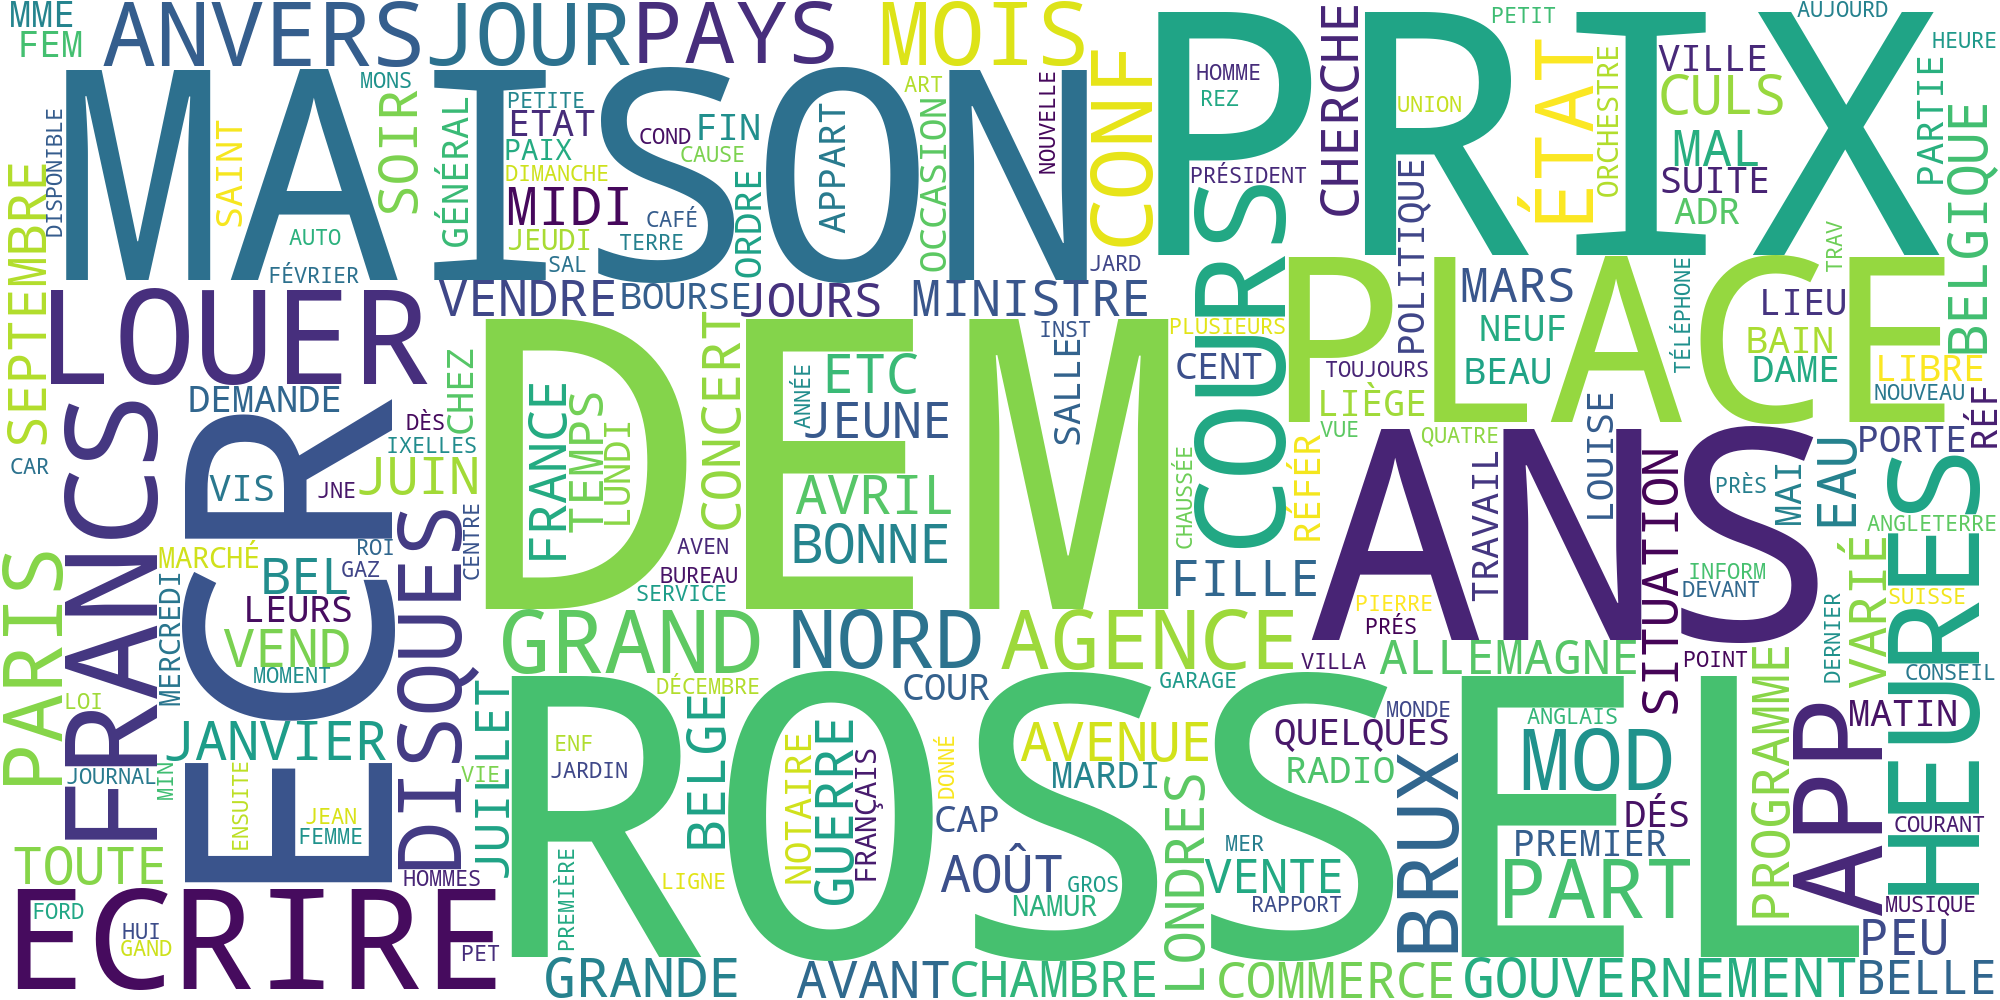

In [21]:
#Afficher le nuage de mots selon la frequence
cloud = WordCloud(width=2000, height=1000, background_color='white').generate_from_frequencies(frequencies)
cloud.to_file(os.path.join(temp_path, f"{year}.png"))
output_path = os.path.join(temp_path, f"{year}.png")
cloud.to_file(output_path)
Image(filename=os.path.join(temp_path, f"{year}.png"))

In [22]:
nlp = spacy.load('fr_core_news_md')

In [23]:
# Traiter le texte stocké dans la variable texte
doc = nlp(text)


people = defaultdict(int)
orgs = defaultdict(int)
places = defaultdict(int)

# Parcourir les entités
for ent in doc.ents:
    if ent.label_ == "PER":
        people[ent.text] += 1
    elif ent.label_ == "ORG":
        orgs[ent.text] += 1
    elif ent.label_ in ["LOC", "GPE", "FAC"]:  
        places[ent.text] += 1


In [27]:
def print_top_entities(d, title, top=10):
    print(f"\n Top {top} {title} ")
    sorted_entities = sorted(d.items(), key=lambda kv: kv[1], reverse=True)
    for ent, freq in sorted_entities[:top]:
        print(f"{ent} apparait {freq} fois")

In [28]:
print_top_entities(people, "personnes")


 Top 10 personnes 
Ag apparait 16 fois
Rossel apparait 13 fois
Libby’ apparait 6 fois
Jacques apparait 4 fois
Ecrire Ag apparait 3 fois
Henri do Laruns apparait 3 fois
Clara apparait 3 fois
Arnaud apparait 3 fois
Juliette apparait 2 fois
Maman apparait 2 fois


In [29]:
print_top_entities(orgs, "organisations")


 Top 10 organisations 
Téléphone apparait 2 fois
U apparait 2 fois
Garantie apparait 1 fois
CEI apparait 1 fois
Compto chèque apparait 1 fois
Postal apparait 1 fois
Horlogerie A. BONNET apparait 1 fois
MONDE apparait 1 fois
ROTTERDAM apparait 1 fois
DPTITC apparait 1 fois


In [30]:
print_top_entities(places, "lieux")


 Top 10 lieux 
Bruxelles apparait 5 fois
fr apparait 3 fois
Tours apparait 3 fois
Brux apparait 3 fois
B apparait 2 fois
A apparait 2 fois
Ec apparait 2 fois
occ apparait 2 fois
F apparait 1 fois
Bracelet apparait 1 fois


8. Sélectionnez arbitrairement 10 phrases dans les articles de l’année choisie
et analysez-les à l’aide du notebook s4_sentiment.ipynb, puis résumez les
résultats dans un tableau indiquant leur polarité et leur subjectivité

In [32]:
import random
from textblob import Blobber
from textblob_fr import PatternTagger, PatternAnalyzer
import pandas as pd
import re

In [33]:
# Instancier l'analyseur
tb = Blobber(pos_tagger=PatternTagger(), analyzer=PatternAnalyzer())
#Rassembler les articles de 1939 dans une liste 
texts_1939 = []
for this_file in txts:
    with open(os.path.join(txt_path, this_file), "r", encoding="utf-8") as f:
        text = f.read()
        texts_1939.append(text)

In [34]:
# Fusionner tout le texte en un seul bloc
full_text = " ".join(texts_1939)



In [35]:
# Découper en phrases simples
sentences = re.split(r'(?<=[.!?]) +', full_text)

In [39]:
# Sélectionner 10 phrases arbitraires (si assez longues)
sentences_sample = [s for s in sentences if len(s.split()) > 6]
sampled_sentences = random.sample(sentences_sample, 10)

In [40]:
sampled_sentences

['Louise Rainer et Alan Marshall sont les protagonistes convaincus de ce film émouvant, mis en scène avec talent par Robert Sinclair.',
 "Il est prudent pour un critique de cinéma de ne pas abuser du mot chef-d'œuvre.",
 'Agence Rossel sous le n»19868V —PARQUETS CI RftS Rem.',
 'V* 1 " ^0.- SOLDÉ CS/365 GRAND CHOIX DE FLEURS pour corsages.',
 '3 15 lnd,Cbimiques 8150 Ind.Chlm.p.l 420 Laeken 1800 La Métal.Chlm.p.',
 'cas où le pire viendrait’ à se produire, dè renoncer momentanément à nos concessions et à nos intérêts en Chine, et de supporter toutes les pertes que cela entraînerait plutôt que de faillir & notre devoir d’aider, et de soutenir les Chinois dans leur lutte atroce, mais qui n’a jamais été si riche en espérances, pour le droit et la liberté.',
 'Le comte Ciano a notamment déclaré: La pacte que nous venons de signer fixé sans équivoque la solidarité politique et militaire complète de l’Allemagne et de l’Italie..',
 "L’avion Congo —'Belgique a quitté Fort-Archambadd à 12 h.",


In [41]:
#Creation d'une fonction get sentiment
def get_sentiment(input_text):
    blob = tb(input_text)
    polarity, subjectivity = blob.sentiment
    polarity_perc = f"{100*abs(polarity):.0f}"
    subjectivity_perc = f"{100*subjectivity:.0f}"
    if polarity > 0:
        polarity_str = f"{polarity_perc}% positive"
    elif polarity < 0:
        polarity_str = f"{polarity_perc}% negative"
    else:
        polarity_str = "neutral"
    if subjectivity > 0:
        subjectivity_str = f"{subjectivity_perc}% subjective"
    else:
        subjectivity_str = "perfectly objective"
    print(f"This text is {polarity_str} and {subjectivity_str}.")

In [42]:
# Analyse le sentiment et la subjectivité de chaque phrase de sampled_sentences 
# et stocke les résultats sous forme de dictionnaire avec valeurs et catégories
results = []
for s in sampled_sentences:
    blob = tb(s)
    polarity, subjectivity = blob.sentiment
    # Conversion en pourcentages
    polarity_perc = f"{100*abs(polarity):.0f}%"
    subjectivity_perc = f"{100*subjectivity:.0f}%"
    if polarity > 0:
        polarity_cat = "positive"
    elif polarity < 0:
        polarity_cat = "negative"
    else:
        polarity_cat = "neutral"
        
    if subjectivity > 0.5:
        subjectivity_cat = "subjective"
    else:
        subjectivity_cat = "objective"
    
    results.append({
        "text": s,
        "polarity_value": polarity,
        "polarity_perc": polarity_perc,
        "polarity": polarity_cat,
        "subjectivity_value": subjectivity,
        "subjectivity_perc": subjectivity_perc,
        "subjectivity": subjectivity_cat
    })
